In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import seaborn as sn
import matplotlib.pyplot as pit

In [2]:
wq=pd.read_csv('rish.csv')


In [3]:
wq.head()

,Q (cumec),EC_GEN (�mho/cm),pH_GEN (pH units),Temp (deg C),TDS,Alk-Phen (mgCaCO3/L),ALK-TOT (mgCaCO3/L),Ca (mg/L),Cl (mg/L),CO3 (mg/L),...,NO2+NO3 (mg N/L),NO2-N (mgN/L),NO3-N (mgN/L),o-PO4-P (mg P/L),SiO2 (mg/L),SO4 (mg/L),BOD3-27 (mg/L),DO (mg/L),DO_SAT% (%),MAX DO
0,394.0,180,7.8,19.0,0.0,0,76,22,13.0,0,...,0.45,0.0,0.45,0.486,42.0,7.6,1.3,7.1,77,1
1,798.5,180,7.3,19.0,0.0,0,72,21,8.0,0,...,0.38,0.0,0.38,0.331,42.0,6.9,1.3,7.0,76,1
2,1130.0,170,7.3,20.0,0.0,0,72,19,7.0,0,...,0.34,0.0,0.34,0.331,40.0,6.9,1.2,7.0,77,1
3,1000.0,126,8.0,19.5,0.0,0,56,7,6.0,0,...,0.34,0.0,0.34,0.331,38.0,6.1,1.2,6.9,74,0
4,572.3,315,7.9,20.0,0.0,0,52,7,5.0,0,...,0.45,0.0,0.45,0.486,36.0,6.9,1.1,7.1,79,1


In [4]:
wq.shape

(107, 25)

In [5]:
wq.size

2675

In [6]:
wq.describe()

,Q (cumec),EC_GEN (�mho/cm),pH_GEN (pH units),Temp (deg C),TDS,Alk-Phen (mgCaCO3/L),ALK-TOT (mgCaCO3/L),Ca (mg/L),Cl (mg/L),CO3 (mg/L),...,NO2+NO3 (mg N/L),NO2-N (mgN/L),NO3-N (mgN/L),o-PO4-P (mg P/L),SiO2 (mg/L),SO4 (mg/L),BOD3-27 (mg/L),DO (mg/L),DO_SAT% (%),MAX DO
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.0,107.000000,107.000000,107.000000,107.0,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000
mean,686.328037,193.074766,7.914019,33.242056,86.932710,0.0,16.953271,5.355140,3.158879,0.0,...,0.102430,0.003458,0.100093,0.158075,8.742056,4.300000,1.962617,7.440187,77.336449,0.654206
std,664.194248,49.616777,0.380032,45.451658,66.317602,0.0,22.092594,7.220584,4.120243,0.0,...,0.182611,0.019038,0.180714,0.263865,15.524576,5.159695,4.751534,0.877696,8.356383,0.477865
min,183.000000,118.000000,7.100000,11.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,3.900000,39.000000,0.000000
25%,276.250000,160.500000,7.700000,15.300000,16.150000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000,7.000000,73.000000,0.000000
50%,416.000000,184.000000,7.900000,18.000000,100.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.200000,7.400000,77.000000,1.000000
75%,773.600000,213.500000,8.100000,20.500000,140.000000,0.0,35.000000,10.000000,6.900000,0.0,...,0.120000,0.000000,0.110000,0.240000,7.300000,9.200000,1.650000,8.000000,83.000000,1.000000
max,2957.000000,350.000000,10.000000,210.000000,240.000000,0.0,76.000000,36.000000,21.000000,0.0,...,0.520000,0.140000,0.520000,0.816000,42.000000,17.300000,50.100000,9.400000,94.000000,1.000000


In [7]:
wq.isnull().sum()

Q (cumec)               0
EC_GEN (�mho/cm)        0
pH_GEN (pH units)       0
Temp (deg C)            0
TDS                     0
Alk-Phen (mgCaCO3/L)    0
ALK-TOT (mgCaCO3/L)     0
Ca (mg/L)               0
Cl (mg/L)               0
CO3 (mg/L)              0
F (mg/L)                0
HCO3 (mg/L)             0
K (mg/L)                0
Mg (mg/L)               0
Na (mg/L)               0
NO2+NO3 (mg N/L)        0
NO2-N (mgN/L)           0
NO3-N (mgN/L)           0
o-PO4-P (mg P/L)        0
SiO2 (mg/L)             0
SO4 (mg/L)              0
BOD3-27 (mg/L)          0
DO (mg/L)               0
DO_SAT% (%)             0
MAX DO                  0
dtype: int64

array([[<AxesSubplot:title={'center':'Q (cumec)'}>,
        <AxesSubplot:title={'center':'EC_GEN (�mho/cm)'}>,
        <AxesSubplot:title={'center':'pH_GEN (pH units)'}>,
        <AxesSubplot:title={'center':'Temp (deg C)'}>,
        <AxesSubplot:title={'center':'TDS'}>],
       [<AxesSubplot:title={'center':'Alk-Phen (mgCaCO3/L)'}>,
        <AxesSubplot:title={'center':'ALK-TOT (mgCaCO3/L)'}>,
        <AxesSubplot:title={'center':'Ca (mg/L)'}>,
        <AxesSubplot:title={'center':'Cl (mg/L)'}>,
        <AxesSubplot:title={'center':'CO3 (mg/L)'}>],
       [<AxesSubplot:title={'center':'F (mg/L)'}>,
        <AxesSubplot:title={'center':'HCO3 (mg/L)'}>,
        <AxesSubplot:title={'center':'K (mg/L)'}>,
        <AxesSubplot:title={'center':'Mg (mg/L)'}>,
        <AxesSubplot:title={'center':'Na (mg/L)'}>],
       [<AxesSubplot:title={'center':'NO2+NO3 (mg N/L)'}>,
        <AxesSubplot:title={'center':'NO2-N (mgN/L)'}>,
        <AxesSubplot:title={'center':'NO3-N (mgN/L)'}>,
        <Axe

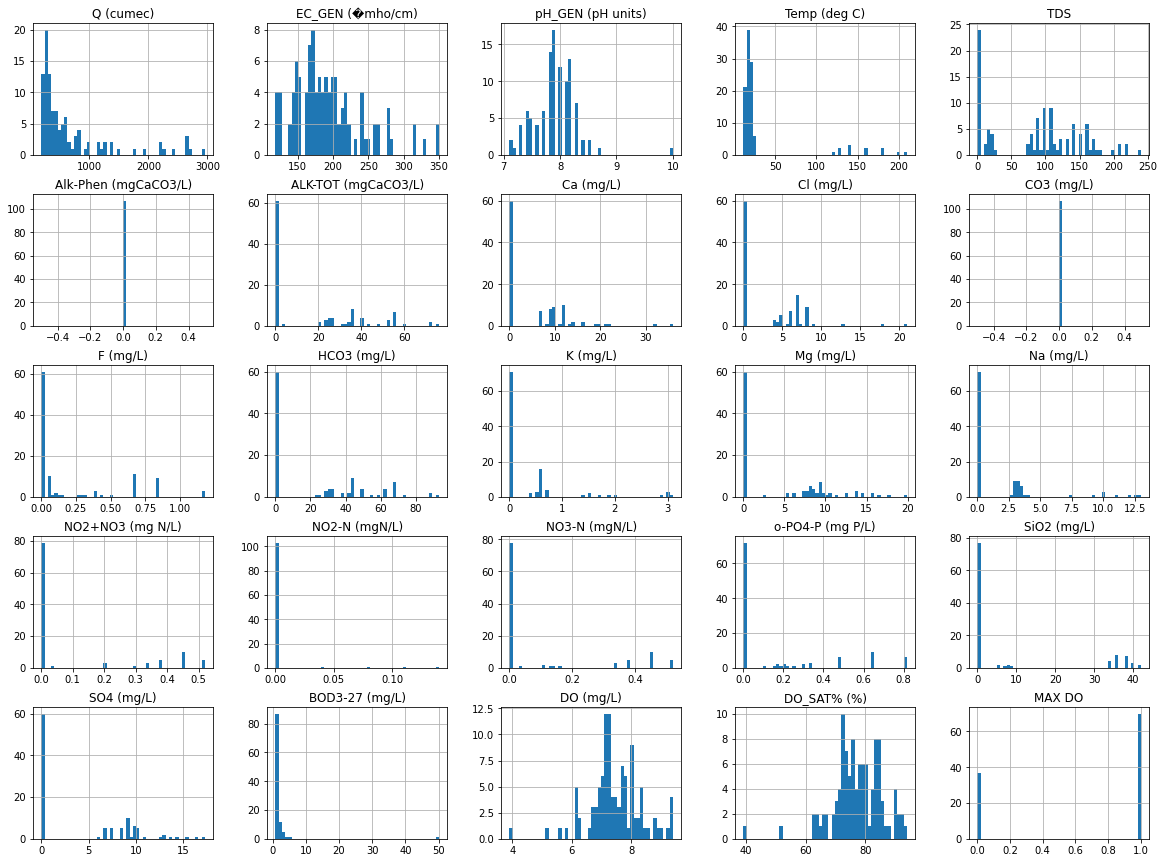

In [8]:
wq.hist(bins=50, figsize=(20,15))

array([[<AxesSubplot:xlabel='Q (cumec)', ylabel='Q (cumec)'>,
        <AxesSubplot:xlabel='BOD3-27 (mg/L)', ylabel='Q (cumec)'>,
        <AxesSubplot:xlabel='DO (mg/L)', ylabel='Q (cumec)'>,
        <AxesSubplot:xlabel='DO_SAT% (%)', ylabel='Q (cumec)'>,
        <AxesSubplot:xlabel='MAX DO', ylabel='Q (cumec)'>],
       [<AxesSubplot:xlabel='Q (cumec)', ylabel='BOD3-27 (mg/L)'>,
        <AxesSubplot:xlabel='BOD3-27 (mg/L)', ylabel='BOD3-27 (mg/L)'>,
        <AxesSubplot:xlabel='DO (mg/L)', ylabel='BOD3-27 (mg/L)'>,
        <AxesSubplot:xlabel='DO_SAT% (%)', ylabel='BOD3-27 (mg/L)'>,
        <AxesSubplot:xlabel='MAX DO', ylabel='BOD3-27 (mg/L)'>],
       [<AxesSubplot:xlabel='Q (cumec)', ylabel='DO (mg/L)'>,
        <AxesSubplot:xlabel='BOD3-27 (mg/L)', ylabel='DO (mg/L)'>,
        <AxesSubplot:xlabel='DO (mg/L)', ylabel='DO (mg/L)'>,
        <AxesSubplot:xlabel='DO_SAT% (%)', ylabel='DO (mg/L)'>,
        <AxesSubplot:xlabel='MAX DO', ylabel='DO (mg/L)'>],
       [<AxesSubplot:xlabel='Q

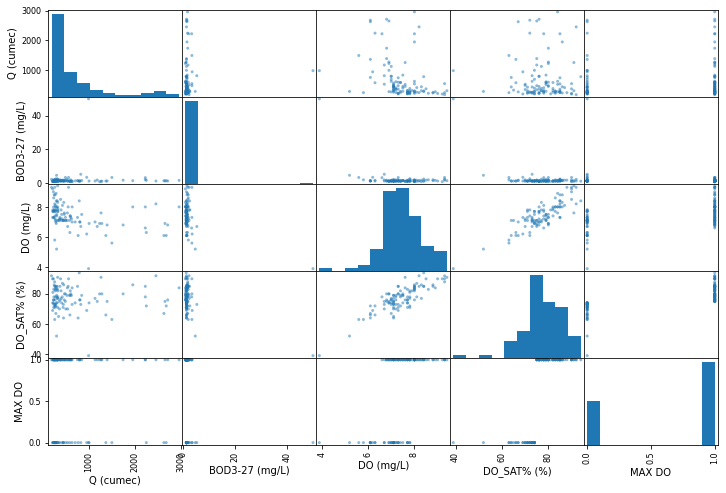

In [9]:
from pandas.plotting import scatter_matrix
attributes=["Q (cumec)","BOD3-27 (mg/L)","DO (mg/L)","DO_SAT% (%)","MAX DO"]
scatter_matrix(wq[attributes],figsize=(12,8))          
               

<AxesSubplot:xlabel='Q (cumec)', ylabel='MAX DO'>

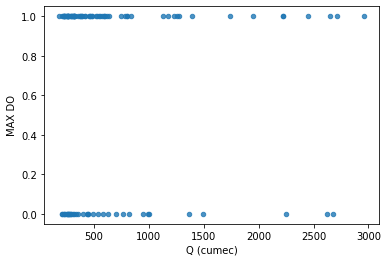

In [10]:
wq.plot(kind="scatter", x="Q (cumec)", y="MAX DO",alpha=0.8)

In [11]:
wq.drop("Alk-Phen (mgCaCO3/L)", axis=1)


,Q (cumec),EC_GEN (�mho/cm),pH_GEN (pH units),Temp (deg C),TDS,ALK-TOT (mgCaCO3/L),Ca (mg/L),Cl (mg/L),CO3 (mg/L),F (mg/L),...,NO2+NO3 (mg N/L),NO2-N (mgN/L),NO3-N (mgN/L),o-PO4-P (mg P/L),SiO2 (mg/L),SO4 (mg/L),BOD3-27 (mg/L),DO (mg/L),DO_SAT% (%),MAX DO
0,394.0,180,7.8,19.0,0.0,76,22,13.0,0,1.18,...,0.45,0.0,0.45,0.486,42.0,7.6,1.3,7.1,77,1
1,798.5,180,7.3,19.0,0.0,72,21,8.0,0,0.84,...,0.38,0.0,0.38,0.331,42.0,6.9,1.3,7.0,76,1
2,1130.0,170,7.3,20.0,0.0,72,19,7.0,0,0.84,...,0.34,0.0,0.34,0.331,40.0,6.9,1.2,7.0,77,1
3,1000.0,126,8.0,19.5,0.0,56,7,6.0,0,0.68,...,0.34,0.0,0.34,0.331,38.0,6.1,1.2,6.9,74,0
4,572.3,315,7.9,20.0,0.0,52,7,5.0,0,0.68,...,0.45,0.0,0.45,0.486,36.0,6.9,1.1,7.1,79,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,316.4,145,7.3,12.5,110.0,0,0,0.0,0,0.00,...,0.00,0.0,0.00,0.000,0.0,0.0,1.1,7.7,71,0
103,316.4,169,7.9,12.5,100.0,0,0,0.0,0,0.00,...,0.00,0.0,0.00,0.000,0.0,0.0,0.8,8.3,77,1
104,316.4,200,7.7,15.0,150.0,0,0,0.0,0,0.00,...,0.00,0.0,0.00,0.000,0.0,0.0,2.3,7.8,77,1
105,460.0,155,7.8,16.0,120.0,0,0,0.0,0,0.00,...,0.00,0.0,0.00,0.000,0.0,0.0,1.0,7.6,76,1


In [12]:
from sklearn.metrics import accuracy_score

In [13]:
wq.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Q (cumec)             107 non-null    float64
 1   EC_GEN (�mho/cm)      107 non-null    int64  
 2   pH_GEN (pH units)     107 non-null    float64
 3   Temp (deg C)          107 non-null    float64
 4   TDS                   107 non-null    float64
 5   Alk-Phen (mgCaCO3/L)  107 non-null    int64  
 6   ALK-TOT (mgCaCO3/L)   107 non-null    int64  
 7   Ca (mg/L)             107 non-null    int64  
 8   Cl (mg/L)             107 non-null    float64
 9   CO3 (mg/L)            107 non-null    int64  
 10  F (mg/L)              107 non-null    float64
 11  HCO3 (mg/L)           107 non-null    int64  
 12  K (mg/L)              107 non-null    float64
 13  Mg (mg/L)             107 non-null    float64
 14  Na (mg/L)             107 non-null    float64
 15  NO2+NO3 (mg N/L)      1

In [14]:
x=wq.drop(columns='MAX DO', axis=1)
y=wq['MAX DO']

In [15]:
wq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Q (cumec)             107 non-null    float64
 1   EC_GEN (�mho/cm)      107 non-null    int64  
 2   pH_GEN (pH units)     107 non-null    float64
 3   Temp (deg C)          107 non-null    float64
 4   TDS                   107 non-null    float64
 5   Alk-Phen (mgCaCO3/L)  107 non-null    int64  
 6   ALK-TOT (mgCaCO3/L)   107 non-null    int64  
 7   Ca (mg/L)             107 non-null    int64  
 8   Cl (mg/L)             107 non-null    float64
 9   CO3 (mg/L)            107 non-null    int64  
 10  F (mg/L)              107 non-null    float64
 11  HCO3 (mg/L)           107 non-null    int64  
 12  K (mg/L)              107 non-null    float64
 13  Mg (mg/L)             107 non-null    float64
 14  Na (mg/L)             107 non-null    float64
 15  NO2+NO3 (mg N/L)      1

In [16]:
print(x)

     Q (cumec)  EC_GEN (�mho/cm)  pH_GEN (pH units)  Temp (deg C)    TDS  \
0        394.0               180                7.8          19.0    0.0   
1        798.5               180                7.3          19.0    0.0   
2       1130.0               170                7.3          20.0    0.0   
3       1000.0               126                8.0          19.5    0.0   
4        572.3               315                7.9          20.0    0.0   
..         ...               ...                ...           ...    ...   
102      316.4               145                7.3          12.5  110.0   
103      316.4               169                7.9          12.5  100.0   
104      316.4               200                7.7          15.0  150.0   
105      460.0               155                7.8          16.0  120.0   
106      590.4               121                7.9          19.0  100.0   

     Alk-Phen (mgCaCO3/L)  ALK-TOT (mgCaCO3/L)  Ca (mg/L)  Cl (mg/L)  \
0              

In [17]:
print(y)

0      1
1      1
2      1
3      0
4      1
      ..
102    0
103    1
104    1
105    1
106    1
Name: MAX DO, Length: 107, dtype: int64


In [18]:
x_train, x_test,y_train,y_test= train_test_split(x,y,test_size=0.2, stratify=y, random_state=1)

In [19]:
print(x.shape,x_train.shape,x_test.shape)

(107, 24) (85, 24) (22, 24)


In [20]:
##Model Fitting
model=LogisticRegression()
model.fit(x_train, y_train)

C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [21]:
x_train
model.fit(x_train, y_train)

C:\Program Files\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
# from sklearn.linear_model import TweedieRegressor
# >>> reg = TweedieRegressor(power=1, alpha=0.5, link='log')
# >>> reg.fit([[0, 0], [0, 1], [2, 2]], [0, 1, 2])
# TweedieRegressor(alpha=0.5, link='log', power=1)
# >>> reg.coef_

In [23]:
# reg.intercept_

In [24]:
x_train_pred=model.predict(x_train)
train_data_accuracy=accuracy_score(x_train_pred, y_train)

In [25]:
print('Accuracy of tarining data is :',train_data_accuracy)

Accuracy of tarining data is : 0.8470588235294118


In [26]:
x_test_pred=model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_pred, y_test)

In [27]:
print('Accuracy of test data is :',test_data_accuracy)

Accuracy of test data is : 0.7727272727272727


In [28]:
corr_matrix = wq.corr()
corr_matrix['MAX DO'].sort_values(ascending=False)

MAX DO                  1.000000
DO_SAT% (%)             0.731071
DO (mg/L)               0.535036
Temp (deg C)            0.134586
pH_GEN (pH units)       0.094477
Q (cumec)               0.028449
TDS                     0.025306
EC_GEN (�mho/cm)       -0.078477
NO2-N (mgN/L)          -0.136936
Na (mg/L)              -0.139130
BOD3-27 (mg/L)         -0.151582
ALK-TOT (mgCaCO3/L)    -0.151670
Ca (mg/L)              -0.182802
HCO3 (mg/L)            -0.198073
K (mg/L)               -0.205589
SiO2 (mg/L)            -0.214711
Mg (mg/L)              -0.217377
SO4 (mg/L)             -0.232249
Cl (mg/L)              -0.238717
NO3-N (mgN/L)          -0.247606
o-PO4-P (mg P/L)       -0.263303
NO2+NO3 (mg N/L)       -0.264877
F (mg/L)               -0.266721
Alk-Phen (mgCaCO3/L)         NaN
CO3 (mg/L)                   NaN
Name: MAX DO, dtype: float64

In [29]:
## Saving the model
from joblib import dump, load
dump(model, 'wq.joblib') 

['wq.joblib']

In [30]:
x_test=wq.drop(columns='MAX DO', axis=1)
y_test=wq['MAX DO']

final_predictions = model.predict(x_test)
print(final_predictions, list(y_test))

[1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1
 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1] [1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1]


In [31]:
from joblib import dump, load
import numpy as np
model = load('wq.joblib') 
features = np.array([[ 259.3,121,7.9,16,0,0,48,9,5,0,0.84,59,0.6,11.5,2.9,0.52,0,0.52,0.486,34,6.9,1.2,7.2,70]])
model.predict(features)

array([1], dtype=int64)

In [32]:
from sklearn.metrics import recall_score
y_true = [1,1,1,0,1,0,0,0,0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,0]
y_pred = [1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0]
recall_score(y_true, y_pred, average='micro')
# recall_score(y_true, y_pred, average=None)

0.75

In [33]:
from sklearn.metrics import precision_score
y_true = [1,1,1,0,1,0,0,0,0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,0]
y_pred = [1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,0,0,0,0]
precision_score(y_true, y_pred, average='micro')
# precision_score(y_true, y_pred, average='weighted')
# precision_score(y_true, y_pred, average=None)

0.75